In [1]:
import random
import gymnasium as gym
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.WARNING)

In [2]:
def update_reward(qtable, state, action, new_state, alpha, gamma):
    old_reward = qtable[state][action]
    # max[a](Q[s+1,a]) --> B
    next_better_value = max(qtable[new_state])
    # gamma * B --> C
    new_reward = next_better_value * gamma
    # reward + C - A --> D
    new_reward = new_reward + res[1] - old_reward
    # alpha * D --> E
    new_reward = new_reward * alpha
    # A + E --> Q[s,a]
    new_reward = new_reward + old_reward

    logging.info(f"old_reward: {old_reward}")
    logging.info(f"new_reward: {new_reward}\n")

    return new_reward

In [3]:
def show(list_result):
    arrayX = []
    arrayY = []
    nb_total = len(list_result)
    for i in range(nb_total):
        result = list_result[:i].count(1)
        # value = result/(i+1)
        arrayY.append(result) 
        arrayX.append(i)

    plt.plot(arrayX, arrayY)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title("")

    plt.show()


In [4]:
# GLB_NB_ROW = 7
# GLB_NB_COLUMN = 12 
# map_matrice = [['F' for _ in range(GLB_NB_COLUMN)] for _ in range(GLB_NB_ROW)]


# number_of_state = GLB_NB_ROW*GLB_NB_COLUMN 
# nb_hole = int(number_of_state*0.2)


# list_indice_hole = []
# indice_goal = None

# list_indice_hole = random.sample(range(number_of_state), nb_hole)
# indice_goal = random.randint(4, number_of_state-1)
# while(indice_goal in list_indice_hole):
#     indice_goal = random.randint(4, number_of_state-1)

# for i in range(len(list_indice_hole)):
#     indice = list_indice_hole[i]
#     row_indice = indice // GLB_NB_COLUMN
#     column_indice = indice % GLB_NB_ROW

#     map_matrice[row_indice][column_indice] = 'H'


# row_indice = indice_goal // GLB_NB_COLUMN
# column_indice = indice_goal % GLB_NB_ROW
# map_matrice[row_indice][column_indice] = 'G'


# custom_map = [''.join(row) for row in map_matrice]
# print(custom_map)

In [5]:
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

custom_map = [  'FFHHFFFFFFFF',
                'HFFFHHFFFFFF',
                'HFHFFHFFFFFF',
                'FFFFHFFFFFFF',
                'FFFFFFHFFFFF',
                'HFFFFFFFFFFF',
                'FFGFHFFFFFFF']

# create the environment
# environment = gym.make("FrozenLake-v1", desc=custom_map, is_slippery=False, render_mode="human")
environment = gym.make("FrozenLake-v1", desc=custom_map, is_slippery=False)

c:\Users\Nicolas\Desktop\Epitech-Gitlab\T-AIA-902-TLS_6\.venv\lib\site-packages\gymnasium\envs\toy_text\frozen_lake.py:237: RuntimeWarning: invalid value encountered in divide
  self.initial_state_distrib /= self.initial_state_distrib.sum()


In [6]:
# create matrix [state*action]
state_size = environment.observation_space.n 
action_size = environment.action_space.n  

logging.info(f"State size: {state_size}")
logging.info(f"Action size: {action_size}\n")

# Init the qTable
qtable = [[0 for _ in range(action_size)] for _ in range(state_size)]
# qtable =[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0], [0, 0, 0, 0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.3375, 0.0, 0.0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0.0, 0.225, 0.0], [0.0, 0, 0.875, 0], [0, 0, 0, 0]]


In [7]:

# Init parameters
episode = 2000
alpha = 0.5
gamma = 0.9

logging.info(f"number episode: {episode}")
logging.info(f"value alpha: {alpha}")
logging.info(f"value gamma: {gamma}\n")

list_result = []
list_saved_path = []

## Train ##
for _ in range(episode):
    # restart the env
    environment.reset() 
    # init the first state
    state = 0
    done = False 

    # path buffer for each episode
    path = []
    while(not done):        
        if(max(qtable[state]) > 0):
            better_value = max(qtable[state])
            action =  qtable[state].index(better_value)
        else:
            action = environment.action_space.sample()

        res = environment.step(action)

        # q_learning update formule:
        # Q[s,a] = Q[s,a] + alpha*(reward + gamma*max[a](Q[s+1,a]) - Q[s,a])
        new_reward = update_reward(qtable, state, action, res[0], alpha, gamma)
 
        qtable[state][action] = new_reward - 0.0001

        path.append(action)

        state = res[0]
        done = res[2]

    if(res[1] == 1):
        list_saved_path.append(path)
        list_result.append(1)
    else:
        list_result.append(0)
    

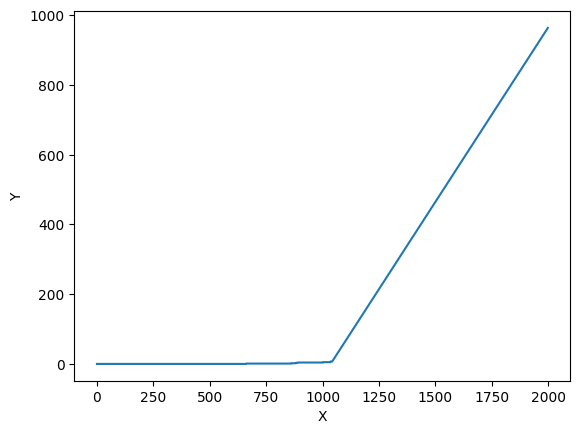

In [8]:
show(list_result)

In [9]:
number_good_path = len(list_saved_path)
# print(qtable)
# print(list_saved_path[number_good_path - 3:])

In [10]:
list_path = list_saved_path[:10]
environment = gym.make("FrozenLake-v1", desc=custom_map, is_slippery=False, render_mode="human")
for i in range(len(list_path)):
    good_path = list_path[i]
    environment.reset()
    for j in range(len(good_path)):
        action = good_path[j]
        environment.step(action)

environment.close()